In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost as xgb
import os

# Data preparation and analysis

In [2]:
train = pd.read_csv("data" + os.sep + "internship_train.csv")
test = pd.read_csv("data" + os.sep + "internship_hidden_test.csv")
X = train.iloc[:, :53]
y = train.iloc[:, 53]

In [3]:
pd.options.display.max_columns = 100
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [4]:
train.isna().sum().sum()

0

<AxesSubplot: >

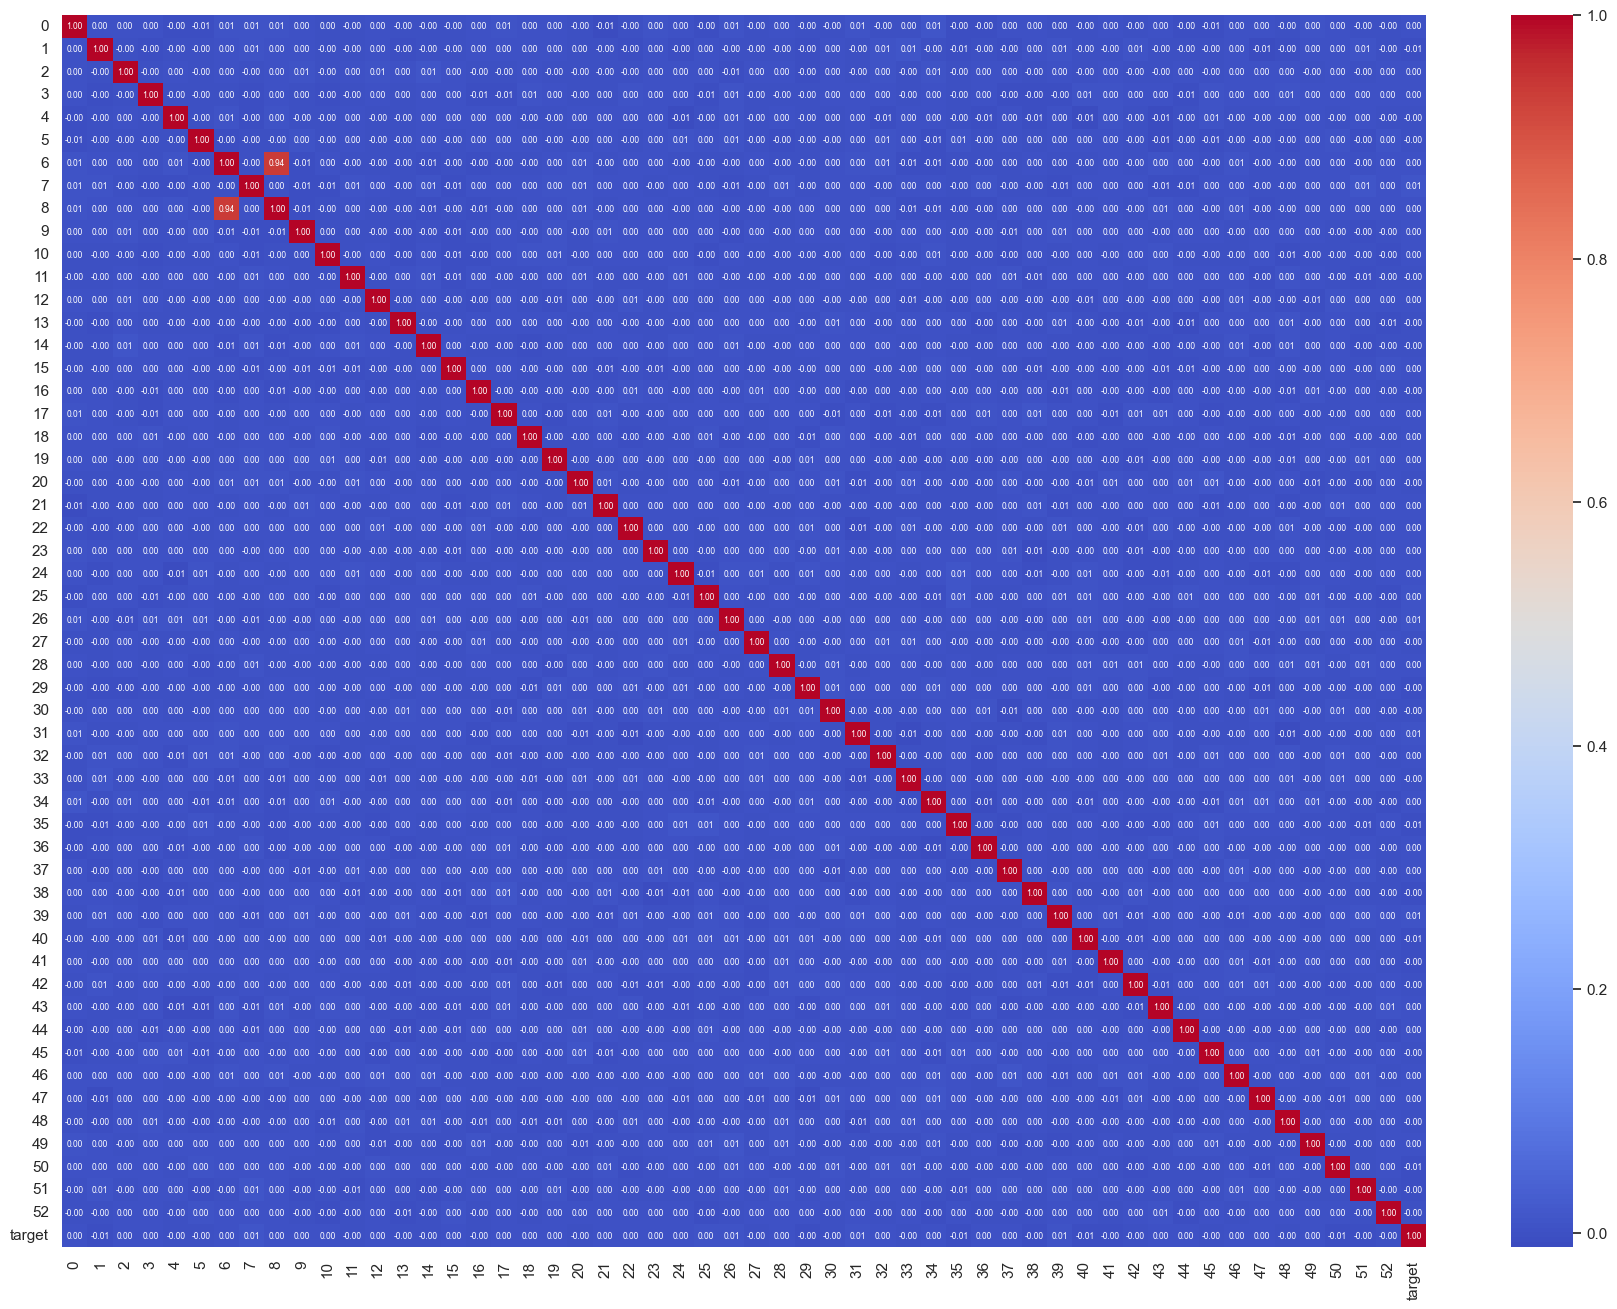

In [5]:
sns.set(rc = {'figure.figsize':(22, 16)})
sns.heatmap(train.corr(), annot = True, fmt='.2f',cmap= 'coolwarm', annot_kws={'size': 6})

In [6]:
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Hyperparameter tuning

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [9]:
scaler = StandardScaler().fit(X_train)
X_val_scaled = scaler.transform(X_val)

In [10]:
param_grid = {"learning_rate": [0.01, 0.015],
              "n_estimators": [400, 500, 600],
              "max_depth": [4, 5]}

best_params = {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}
tune = False

if tune:
    search = GridSearchCV(estimator=regressor,
                          param_grid=param_grid,
                          n_jobs=-1,
                          cv=3).fit(X_val_scaled, y_val)
    best_params = search.best_params_
    print(f"The best hyperparameters are: {best_params}")

# XGBoost regression 

In [11]:
regressor = xgb.XGBRegressor(learning_rate=best_params["learning_rate"],
                         n_estimators=best_params["n_estimators"],
                         max_depth=best_params["max_depth"],
                         eval_metric='rmse')
model = make_pipeline(StandardScaler(), regressor)
res = model.fit(X_train, y_train)

In [12]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(f"RMSE on the test data: {rmse}")

RMSE on the test data: 0.03224847104540185


In [13]:
model.score(X_test, y_test)

0.9999987634187325

# Predictions for internship_hidden_test.csv

In [14]:
y_hidden_pred = model.predict(test)
predictions = pd.DataFrame(y_hidden_pred, columns=['predictions']).to_csv('predictions.csv')

# Generating requirements.txt

In [15]:
%%capture
!pip install pipreqsnb

In [16]:
!pipreqsnb

pipreqs  /Users/nikita/task3
INFO: Successfully saved requirements file in /Users/nikita/task3/requirements.txt


In [17]:
!cat requirements.txt

pandas==1.4.4
scikit_learn==1.2.2
seaborn==0.12.2
xgboost==1.7.4
